In [14]:
from search_algorithms import *
import test
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

### Run test and generate raw data 

`perf` contains sample test search problems and the time taken by each algorithm to find solution. It has the following structure.

```
{
    algorithm : List of 
                {
                    start: the start
                    end: the goal node
                    node_count: total nodes inside the graph
                    runtime: the time taken by algorithm to find solution (path from start to end)
                    path_length: the solution length
                }
}
```

In [15]:
perf = test.test_performance()

In [16]:
perf

{<function search_algorithms.depth_first_search(graph, start_node, end_node)>: [{'start': 4,
   'end': 1,
   'node_count': 10,
   'runtime': 4.840000019612489e-06,
   'path_length': 0},
  {'start': 4,
   'end': 9,
   'node_count': 10,
   'runtime': 1.0020000013355455e-05,
   'path_length': 0},
  {'start': 4,
   'end': 0,
   'node_count': 10,
   'runtime': 1.3880000005883629e-05,
   'path_length': 0},
  {'start': 4,
   'end': 8,
   'node_count': 10,
   'runtime': 1.7620000005535984e-05,
   'path_length': 0},
  {'start': 1,
   'end': 9,
   'node_count': 10,
   'runtime': 2.138000000968532e-05,
   'path_length': 0},
  {'start': 1,
   'end': 0,
   'node_count': 10,
   'runtime': 2.500000000509317e-05,
   'path_length': 0},
  {'start': 1,
   'end': 8,
   'node_count': 10,
   'runtime': 3.0020000008335045e-05,
   'path_length': 0},
  {'start': 9,
   'end': 0,
   'node_count': 10,
   'runtime': 3.712000002451532e-05,
   'path_length': 0},
  {'start': 9,
   'end': 8,
   'node_count': 10,
   'r

### Extract average run time from raw data


```
`algs` contains 
    `algorithm` : {
        `total_node_in_graph` : [`average_run_time`, `average_path_length`]
    }
 ```

In [17]:
algs = {}

for alg, samples in perf.items():
    perf_per_node_count = defaultdict(lambda : [0, 0, 0])
    
    for sample in samples:
        perf_per_node_count[sample["node_count"]][0] += 1
        perf_per_node_count[sample["node_count"]][1] += sample["runtime"]
        perf_per_node_count[sample["node_count"]][2] += sample["path_length"]
    
    for key, value in perf_per_node_count.items(): 
        perf_per_node_count[key] = [0, 0]
        perf_per_node_count[key][0] = value[1] / value[0]
        perf_per_node_count[key][1] = value[2] / value[0]
        
    algs[alg] = perf_per_node_count

In [18]:
# algs

# Performance plot

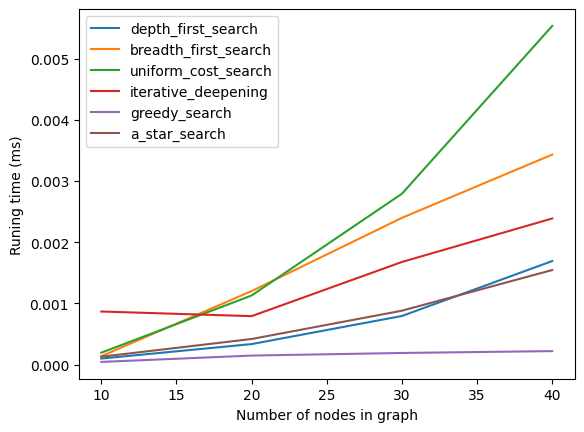

In [19]:
for k, v in algs.items():      
    plt.plot(v.keys(), [val[0] for val in v.values()], label=k.__name__)
    plt.xlabel("Number of nodes in graph")
    plt.ylabel("Runing time (ms)")
    plt.legend(loc="upper left")

As expected the time taken by the algorithms increases as number of node in the graph increases. 


However these doesn't seem to be the case with `Greedy search`. This is because greedy search doesn't bother expanding neigbours, it only chooses the next best node and proceeds without exploring the others. (Although it is not optimal it is fast)


`Uniform cost search` is the most costy algorithm as we can see from the plot, however, we are guaranteed the solution provided by uniform cost search is __optimal__.


`A* search` which is a bread of `greedy` and `uniform cost search` has good performance and can guarantee us an optimal solution if we use admissible heuristic function. (__as we did in this test case__)

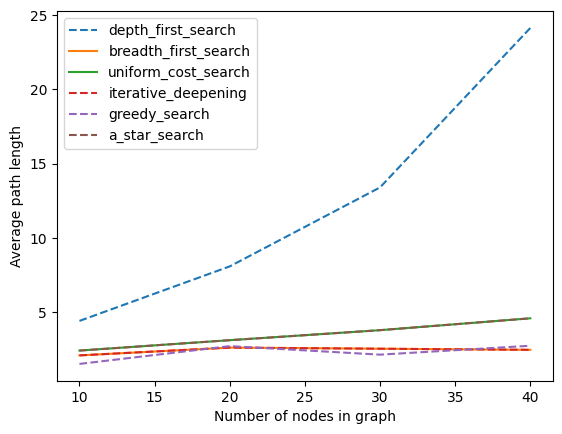

In [28]:
for k, v in algs.items(): 
    if k in [breadth_first_search, uniform_cost_search]:
        plt.plot(v.keys(), [val[1] for val in v.values()], label=k.__name__)
    else:
        plt.plot(v.keys(), [val[1] for val in v.values()], label=k.__name__, linestyle="--")
        plt.xlabel("Number of nodes in graph")
        plt.ylabel("Average path length")    
        plt.legend(loc="upper left")  

Since `Iterative deepening` and `Breadth first search` give us similar solution, they have the same solution length. The same goes for `Uniform cost search` and `A* search` (since we are using admissible heuristic function, it is guarenteed to find optimal solution, which will be same as the uniform cost search).